# DBSCAN

In [73]:
# ############################################################
# This code is from following the linked example below
# - https://youtu.be/2eDFjw456AM
# - https://github.com/siddiquiamir/Python-Clustering-Tutorials/blob/main/DBSCAN.ipynb
# ############################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("data/orange-pca-1.csv")

In [75]:
df.head()

,PC1,PC2
0,4.326118,-0.012737
1,3.844119,-0.343662
2,4.603066,1.383550
3,4.424981,0.142464
4,3.122054,4.133832


In [76]:
df.tail()

,PC1,PC2
904,-2.794578,0.394204
905,-3.094040,2.455981
906,-2.337694,-0.317370
907,-2.391529,-0.227466
908,-2.838633,0.617521


In [77]:
df.shape

(909, 2)

In [78]:
df = df.iloc[:, :].values

In [79]:
df

array([[ 4.32611792, -0.01273669],
       [ 3.84411885, -0.34366171],
       [ 4.60306627,  1.38355021],
       ...,
       [-2.33769372, -0.31737   ],
       [-2.39152937, -0.22746641],
       [-2.8386333 ,  0.61752052]])

In [80]:

# source: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#:~:text=DBSCAN%20(Density%2DBased%20Spatial%20Clustering,contains%20clusters%20of%20similar%20density.

# information on finding parameters: http://www.sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/ 
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

print(f"eps1, min_samples1, n_clusters_, n_noise_")
eps1 = 1
min_samples1 = 1

db = DBSCAN(eps = eps1, min_samples = min_samples1).fit(df)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# print("---------------------")
# print(f"eps: {eps1}, min_samples: {min_samples1}")
# print("Estimated number of clusters: %d" % n_clusters_)
# print("Estimated number of noise points: %d" % n_noise_)
print(f"{eps1}, {min_samples1}, {n_clusters_}, {n_noise_}")

eps1, min_samples1, n_clusters_, n_noise_
1, 1, 4, 0


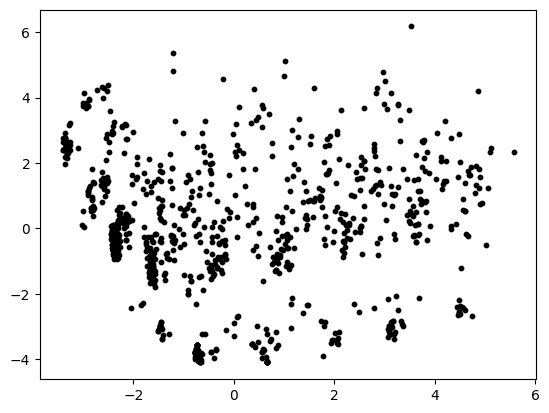

In [81]:
# rest of this stuff is for visualization
# todo: find a better way to visualize this high of a dimension
plt.scatter(df[:,0], df[:,1], s=10, c= "black")

In [82]:
from sklearn.cluster import KMeans

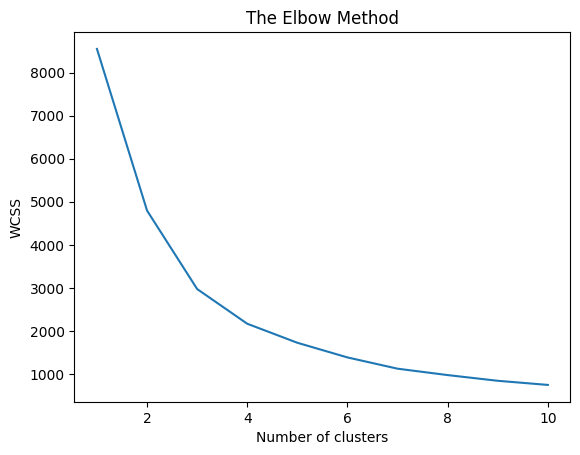

In [83]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [84]:
from sklearn.cluster import DBSCAN

In [85]:
dbscan = DBSCAN(eps=1, min_samples=1)

In [86]:
labels = dbscan.fit_predict(df)

In [87]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int64)

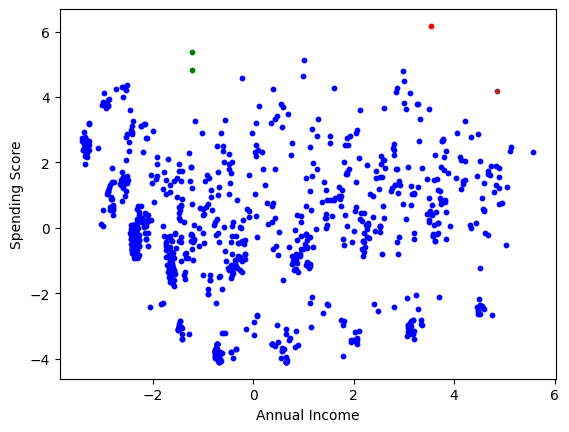

In [88]:
# Visualising the clusters
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s = 10, c = 'black') 

plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s = 10, c = 'red')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s = 10, c = 'green')
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(df[labels == 4, 0], df[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(df[labels == 5, 0], df[labels == 5, 1], s = 10, c = 'yellow')      
plt.scatter(df[labels == 6, 0], df[labels == 6, 1], s = 10, c = 'silver')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()